## PyMySQL
PyMySQL 是在 Python3.x 版本中用于连接 MySQL 服务器的一个库，Python2中则使用mysqldb。
### 安装
pip install PyMySQL

也可以到github上下载

下载地址：https://github.com/PyMySQL/PyMySQL

注意：在使用之前需要先创建好database！

### 连接数据库

In [5]:
#导入pymysql
import pymysql

# 打开数据库连接
#pymysql.connect('地址','用户名','密码','数据库')
db = pymysql.connect("127.0.0.1","root","proot","test")

#使用 cursor() 方法创建一个游标对象 cursor
cursor = db.cursor()

# 使用 execute()  方法执行 SQL 语句
cursor.execute("SELECT VERSION()")

# 使用 fetchone() 方法获取单条数据.
data = cursor.fetchone()
 
print (data)
 
# 关闭数据库连接
db.close()

('8.0.14',)


### 创建表


In [6]:
#导入pymysl
import pymysql
 
# 打开数据库连接
db = pymysql.connect("127.0.0.1","root","proot","test")
 
# 使用 cursor() 方法创建一个游标对象 cursor
cursor = db.cursor()
 
# 使用预处理语句创建表
sql = """create table student
        (
        sno varchar(20) not null primary key,
        sname varchar(20) not null,
        ssex varchar(20) not null,
        sbirthday datetime,
        class varchar(20)
        )
    """
 
cursor.execute(sql)
 
# 关闭数据库连接
db.close()

### 插入数据

In [9]:
import pymysql
 
# 打开数据库连接
db = pymysql.connect("127.0.0.1","root","proot","test")
 
# 使用cursor()方法获取操作游标 
cursor = db.cursor()
 
# SQL 插入语句
sql = "insert into student values('108','曾华','男','1977-09-01','95033');"
try:
   # 执行sql语句
   cursor.execute(sql)
   # 提交到数据库执行
   db.commit()
except:
   # 如果发生错误则回滚
   db.rollback()
 
db.close()

### 查询数据
fetchone(): 该方法获取下一个查询结果集。结果集是一个对象。

fetchall(): 接收全部的返回结果行。

rowcount: 这是一个只读属性，并返回执行execute()方法后影响的行数。

In [17]:
import pymysql
 
# 打开数据库连接
db = pymysql.connect("127.0.0.1","root","proot","test")
 
# 使用cursor()方法获取操作游标 
cursor = db.cursor()
 
# SQL 查询语句
sql = "SELECT * FROM student"
       
try:
   # 执行SQL语句
   cursor.execute(sql)
   # 获取所有记录列表
   results = cursor.fetchall()
   for row in results:
      sno = row[0]
      name = row[1]
      sex = row[2]
      birthday = row[3]
      sclass = row[4]
       # 打印结果
      print ("学号:{}, 姓名:{}, 性别:{}, 生日:{}, 班级:{}".format(sno, name, sex, birthday, sclass))
except:
   print ("Error")
 
# 关闭数据库连接
db.close()

学号:101, 姓名:李军, 性别:男, 生日:1976-02-20 00:00:00, 班级:95033
学号:103, 姓名:陆君, 性别:男, 生日:1974-06-03 00:00:00, 班级:95031
学号:105, 姓名:匡明, 性别:男, 生日:1975-10-02 00:00:00, 班级:95031
学号:107, 姓名:王丽, 性别:女, 生日:1976-01-23 00:00:00, 班级:95033
学号:108, 姓名:曾华, 性别:女, 生日:1977-09-01 00:00:00, 班级:95033
学号:109, 姓名:王芳, 性别:女, 生日:1975-02-10 00:00:00, 班级:95031


### 更新数据

In [13]:
import pymysql
 
# 打开数据库连接
db = pymysql.connect("127.0.0.1","root","proot","test")
 
# 使用cursor()方法获取操作游标 
cursor = db.cursor()
 
# SQL 更新语句
sql = "UPDATE student SET ssex = '女' WHERE sno = '108'"
try:
   # 执行SQL语句
   cursor.execute(sql)
   # 提交到数据库执行
   db.commit()
except:
   # 发生错误时回滚
   db.rollback()
 
# 关闭数据库连接
db.close()

### 删除数据

In [15]:
import pymysql
 
# 打开数据库连接
db = pymysql.connect("127.0.0.1","root","proot","test")
 
# 使用cursor()方法获取操作游标 
cursor = db.cursor()
 
# SQL 删除语句
sql = "DELETE FROM student WHERE ssex = '男'"
try:
   # 执行SQL语句
   cursor.execute(sql)
   # 提交修改
   db.commit()
except:
   # 发生错误时回滚
   db.rollback()
 
# 关闭连接
db.close()

### 执行事务
事务机制可以确保数据一致性。

事务应该具有4个属性：原子性、一致性、隔离性、持久性。这四个属性通常称为ACID特性。

原子性（atomicity）。一个事务是一个不可分割的工作单位，事务中包括的诸操作要么都做，要么都不做。

一致性（consistency）。事务必须是使数据库从一个一致性状态变到另一个一致性状态。一致性与原子性是密切相关的。

隔离性（isolation）。一个事务的执行不能被其他事务干扰。即一个事务内部的操作及使用的数据对并发的其他事务是隔离的，并发执行的各个事务之间不能互相干扰。

持久性（durability）。持续性也称永久性（permanence），指一个事务一旦提交，它对数据库中数据的改变就应该是永久性的。接下来的其他操作或故障不应该对其有任何影响。

对于支持事务的数据库， 在Python数据库编程中，当游标建立之时，就自动开始了一个隐形的数据库事务。

commit()方法游标的所有更新操作，rollback（）方法回滚当前游标的所有操作。每一个方法都开始了一个新的事务。

在Mysql中：

BEGIN 开始一个事务

ROLLBACK 事务回滚

COMMIT 事务确认
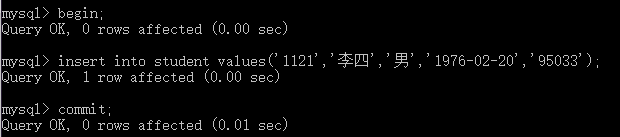



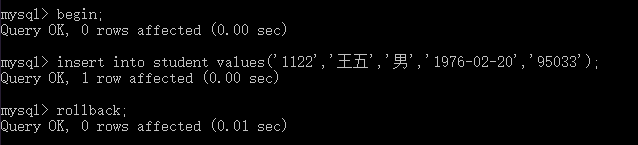